# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [119]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

import matplotlib.pyplot as plt
%matplotlib inline


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

### Step 3. Assign it to a variable titanic 

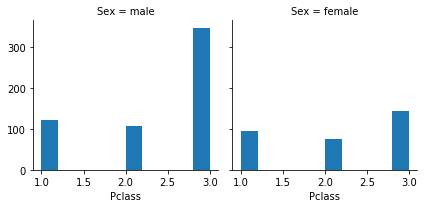

In [120]:
class_1 = titanic[titanic.Pclass == 1]
class_2 = titanic[titanic.Pclass == 2]
class_3 = titanic[titanic.Pclass == 3]
class_3


g = sns.FacetGrid(titanic, col = "Sex")
g.map(plt.hist, "Pclass")

In [121]:
address = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv'
titanic = pd.read_csv(address)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Step 4. Set PassengerId as the index 

In [122]:
titanic_Pid = titanic.set_index('PassengerId')
titanic_Pid

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Step 5. Create a pie chart presenting the male/female proportion

Text(0.5, 1.0, 'Male / Female Proportion')

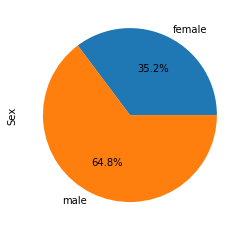

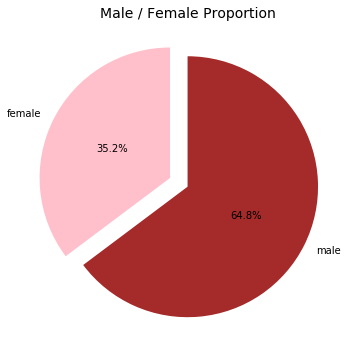

In [183]:
#groupby the data by delivery type
chart_sex = titanic_Pid.groupby("Sex")["Sex"].count()
chart_sex

#simple one liner
chart_sex.plot.pie(autopct="%.1f%%")

#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = chart_sex.keys()
plt.pie(x=chart_sex, autopct="%.1f%%", labels=labels, shadow = False, colors = ['pink', 'brown'], 
    explode = (0.15 , 0),  pctdistance=0.5,  startangle = 90)
plt.title("Male / Female Proportion", fontsize=14)
# pie.savefig("DeliveryPieChart.png")

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

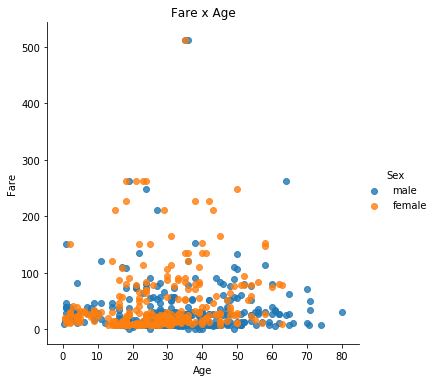

In [187]:
# creates the plot using
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)

# set title
lm.set(title = 'Fare x Age')

# get the axes object and tweak it
# axes = lm.axes
# axes[0,0].set_ylim(-5,)
# axes[0,0].set_xlim(-5,85)

or
plot1 = sns.scatterplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex')
plot1.set(title = 'Fare x Age by Sex')


In [144]:
titanic_Pid

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Step 7. How many people survived?

In [216]:
titanic_Pid[titanic_Pid.Survived == 1].shape[0]
# OR
# titanic_Pid.Survived.sum()

342

### Step 8. Create a histogram with the Fare payed

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Fare'),
 Text(0.5, 1.0, 'Fare of titanic passagers')]

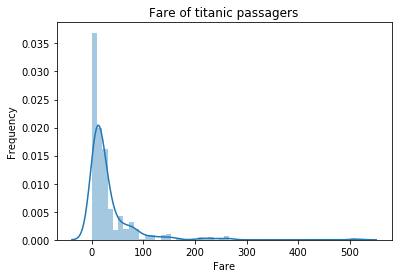

In [219]:
# create histogram
fare_hist = sns.distplot(titanic_Pid.Fare)

# set lables and titles
fare_hist.set(xlabel = 'Fare', ylabel = 'Frequency', title = "Fare of titanic passagers")

### BONUS: Create your own question and answer it.